# Real Case sales Data Analysis

### A sales case by Keith Galli. 
### you can find it here [Here](https://github.com/KeithGalli/Pandas-Data-Science-Tasks)

In [3]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
pd.options.mode.chained_assignment = None

Metadata

In [4]:
# Importing Data

import glob
all_files=glob.glob("Sales_*.csv")
file_list=[]
for file in all_files:
    data=pd.read_csv(file,delimiter=",")
    data["Source file"]=file
    file_list.append(data)
df=pd.concat(file_list)

### 1. Exploring Data

In [5]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Source file
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Sales_April_2019.csv
1,NaN,NaN,NaN,NaN,NaN,NaN,Sales_April_2019.csv
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Sales_April_2019.csv
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv


In [6]:
df.shape
f"{df.shape[0]} Rows by {df.shape[1]} Columns"

'186850 Rows by 7 Columns'

In [7]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Source file
count,186305,186305,186305,186305,186305,186305,186850
unique,178438,20,10,24,142396,140788,12
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address,Sales_December_2019.csv
freq,355,21903,168552,21903,355,355,25117


In [8]:
df.sample(frac=0.1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Source file
9168,170764,Lightning Charging Cable,1,14.95,03/17/19 20:14,"225 West St, Dallas, TX 75001",Sales_March_2019.csv
2662,164543,27in 4K Gaming Monitor,1,389.99,03/31/19 13:34,"776 7th St, New York City, NY 10001",Sales_March_2019.csv
1818,152235,Wired Headphones,1,11.99,02/01/19 14:38,"587 Jackson St, San Francisco, CA 94016",Sales_February_2019.csv
24022,318616,Lightning Charging Cable,1,14.95,12/25/19 11:46,"412 Washington St, New York City, NY 10001",Sales_December_2019.csv
11677,270503,34in Ultrawide Monitor,1,379.99,10/04/19 11:43,"308 Dogwood St, New York City, NY 10001",Sales_October_2019.csv
...,...,...,...,...,...,...,...
14633,292783,Apple Airpods Headphones,1,150,11/13/19 11:41,"530 Lakeview St, New York City, NY 10001",Sales_November_2019.csv
7471,217037,Apple Airpods Headphones,1,150,06/05/19 09:23,"543 Willow St, Los Angeles, CA 90001",Sales_June_2019.csv
7914,184113,27in FHD Monitor,1,149.99,04/10/19 16:18,"826 Walnut St, San Francisco, CA 94016",Sales_April_2019.csv
10685,220113,AAA Batteries (4-pack),1,2.99,06/17/19 18:38,"80 7th St, San Francisco, CA 94016",Sales_June_2019.csv


### 2. Cleaning up the Data!

In [9]:
# Convert headers to lower for better manipulation

df.rename(columns=str.lower,inplace=True)
df.sample()

,order id,product,quantity ordered,price each,order date,purchase address,source file
11236,306384,Google Phone,1,600,12/16/19 16:53,"869 Lincoln St, Dallas, TX 75001",Sales_December_2019.csv


In [10]:
df.columns=df.columns.str.replace(' ','_')
df

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,source_file
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Sales_April_2019.csv
1,NaN,NaN,NaN,NaN,NaN,NaN,Sales_April_2019.csv
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Sales_April_2019.csv
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",Sales_September_2019.csv
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",Sales_September_2019.csv
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",Sales_September_2019.csv
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",Sales_September_2019.csv


In [11]:
df.isnull().sum()

order_id            545
product             545
quantity_ordered    545
price_each          545
order_date          545
purchase_address    545
source_file           0
dtype: int64

In [12]:
# Dropping NaN

df=df.dropna()
df

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,source_file
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Sales_April_2019.csv
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Sales_April_2019.csv
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Sales_April_2019.csv
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",Sales_September_2019.csv
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",Sales_September_2019.csv
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",Sales_September_2019.csv
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",Sales_September_2019.csv


In [13]:
# Casting columns

df.index=np.arange(0,len(df))
df

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,source_file
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Sales_April_2019.csv
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Sales_April_2019.csv
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Sales_April_2019.csv
...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",Sales_September_2019.csv
186301,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",Sales_September_2019.csv
186302,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",Sales_September_2019.csv
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",Sales_September_2019.csv


In [14]:
df.loc[517]

order_id                        Order ID
product                          Product
quantity_ordered        Quantity Ordered
price_each                    Price Each
order_date                    Order Date
purchase_address        Purchase Address
source_file         Sales_April_2019.csv
Name: 517, dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186304
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   order_id          186305 non-null  object
 1   product           186305 non-null  object
 2   quantity_ordered  186305 non-null  object
 3   price_each        186305 non-null  object
 4   order_date        186305 non-null  object
 5   purchase_address  186305 non-null  object
 6   source_file       186305 non-null  object
dtypes: object(7)
memory usage: 13.7+ MB


In [16]:
filter=df.price_each!="Price Each"
df=df.loc[filter]
df

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,source_file
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Sales_April_2019.csv
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Sales_April_2019.csv
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Sales_April_2019.csv
...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",Sales_September_2019.csv
186301,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",Sales_September_2019.csv
186302,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",Sales_September_2019.csv
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",Sales_September_2019.csv


In [41]:
# Casting columns 

df["quantity_ordered"]=pd.to_numeric(df["quantity_ordered"]).astype(int)
df["price_each"]=pd.to_numeric(df["price_each"]).astype(float)
df

,order_id,product,quantity_ordered,price_each,total,order_date,month,month_name,city,purchase_address,source_file
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,04,April,Dallas (TX),"917 1st St, Dallas, TX 75001",Sales_April_2019.csv
1,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,04,April,Boston (MA),"682 Chestnut St, Boston, MA 02215",Sales_April_2019.csv
2,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,04,April,Los Angeles (CA),"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv
3,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,04,April,Los Angeles (CA),"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv
4,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,04,April,Los Angeles (CA),"333 8th St, Los Angeles, CA 90001",Sales_April_2019.csv
...,...,...,...,...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,8.97,09/17/19 20:56,09,September,Los Angeles (CA),"840 Highland St, Los Angeles, CA 90001",Sales_September_2019.csv
186301,259354,iPhone,1,700.00,700.00,09/01/19 16:00,09,September,San Francisco (CA),"216 Dogwood St, San Francisco, CA 94016",Sales_September_2019.csv
186302,259355,iPhone,1,700.00,700.00,09/23/19 07:39,09,September,San Francisco (CA),"220 12th St, San Francisco, CA 94016",Sales_September_2019.csv
186303,259356,34in Ultrawide Monitor,1,379.99,379.99,09/19/19 17:30,09,September,San Francisco (CA),"511 Forest St, San Francisco, CA 94016",Sales_September_2019.csv


In [18]:
# Add total column

df.insert(4,"total","")
df.sample()

,order_id,product,quantity_ordered,price_each,total,order_date,purchase_address,source_file
18346,236692,USB-C Charging Cable,1,11.95,,08/20/19 13:26,"567 Center St, San Francisco, CA 94016",Sales_August_2019.csv


In [19]:
# Calculating total

df=df.assign(total=lambda x:(x["quantity_ordered"]*x["price_each"]))
df.sample()

,order_id,product,quantity_ordered,price_each,total,order_date,purchase_address,source_file
21791,240008,AA Batteries (4-pack),2,3.84,7.68,08/28/19 07:35,"946 Walnut St, Los Angeles, CA 90001",Sales_August_2019.csv


In [20]:
df.insert(6,"month","")
df.sample()

,order_id,product,quantity_ordered,price_each,total,order_date,month,purchase_address,source_file
90544,235875,AA Batteries (4-pack),2,3.84,7.68,07/05/19 12:36,,"243 Church St, Boston, MA 02215",Sales_July_2019.csv


In [21]:
df=df.assign(month=lambda x:(x["order_date"].str[0:2]))
df

,order_id,product,quantity_ordered,price_each,total,order_date,month,purchase_address,source_file
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,04,"917 1st St, Dallas, TX 75001",Sales_April_2019.csv
1,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,04,"682 Chestnut St, Boston, MA 02215",Sales_April_2019.csv
2,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,04,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv
3,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,04,"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv
4,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,04,"333 8th St, Los Angeles, CA 90001",Sales_April_2019.csv
...,...,...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,8.97,09/17/19 20:56,09,"840 Highland St, Los Angeles, CA 90001",Sales_September_2019.csv
186301,259354,iPhone,1,700.00,700.00,09/01/19 16:00,09,"216 Dogwood St, San Francisco, CA 94016",Sales_September_2019.csv
186302,259355,iPhone,1,700.00,700.00,09/23/19 07:39,09,"220 12th St, San Francisco, CA 94016",Sales_September_2019.csv
186303,259356,34in Ultrawide Monitor,1,379.99,379.99,09/19/19 17:30,09,"511 Forest St, San Francisco, CA 94016",Sales_September_2019.csv


In [22]:
df.insert(7,"month_name","")

In [23]:
df["month_name"]=pd.to_datetime(df["month"],format="%m").dt.month_name()
df.sample()

,order_id,product,quantity_ordered,price_each,total,order_date,month,month_name,purchase_address,source_file
93606,212052,USB-C Charging Cable,1,11.95,11.95,06/27/19 10:08,06,June,"963 Hill St, Los Angeles, CA 90001",Sales_June_2019.csv


In [24]:
df.insert(8,"city","")

In [25]:
df.sample()

,order_id,product,quantity_ordered,price_each,total,order_date,month,month_name,city,purchase_address,source_file
100282,218448,AA Batteries (4-pack),1,3.84,3.84,06/30/19 05:33,06,June,,"536 Forest St, San Francisco, CA 94016",Sales_June_2019.csv


In [26]:
df.purchase_address.str.split(",")

0                    [917 1st St,  Dallas,  TX 75001]
1               [682 Chestnut St,  Boston,  MA 02215]
2            [669 Spruce St,  Los Angeles,  CA 90001]
3            [669 Spruce St,  Los Angeles,  CA 90001]
4               [333 8th St,  Los Angeles,  CA 90001]
                             ...                     
186300     [840 Highland St,  Los Angeles,  CA 90001]
186301    [216 Dogwood St,  San Francisco,  CA 94016]
186302       [220 12th St,  San Francisco,  CA 94016]
186303     [511 Forest St,  San Francisco,  CA 94016]
186304     [250 Meadow St,  San Francisco,  CA 94016]
Name: purchase_address, Length: 185950, dtype: object

In [27]:
def get_city(address):
    return address.split(",")[1]
def get_state(address):
    return address.split(",")[2].split(" ")[1]

df["city"]=df["purchase_address"].apply(lambda x:f"{get_city(x)} ({get_state(x)})")
df

,order_id,product,quantity_ordered,price_each,total,order_date,month,month_name,city,purchase_address,source_file
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,04,April,Dallas (TX),"917 1st St, Dallas, TX 75001",Sales_April_2019.csv
1,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,04,April,Boston (MA),"682 Chestnut St, Boston, MA 02215",Sales_April_2019.csv
2,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,04,April,Los Angeles (CA),"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv
3,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,04,April,Los Angeles (CA),"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv
4,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,04,April,Los Angeles (CA),"333 8th St, Los Angeles, CA 90001",Sales_April_2019.csv
...,...,...,...,...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,8.97,09/17/19 20:56,09,September,Los Angeles (CA),"840 Highland St, Los Angeles, CA 90001",Sales_September_2019.csv
186301,259354,iPhone,1,700.00,700.00,09/01/19 16:00,09,September,San Francisco (CA),"216 Dogwood St, San Francisco, CA 94016",Sales_September_2019.csv
186302,259355,iPhone,1,700.00,700.00,09/23/19 07:39,09,September,San Francisco (CA),"220 12th St, San Francisco, CA 94016",Sales_September_2019.csv
186303,259356,34in Ultrawide Monitor,1,379.99,379.99,09/19/19 17:30,09,September,San Francisco (CA),"511 Forest St, San Francisco, CA 94016",Sales_September_2019.csv


### 3. Analyse Data

In [28]:
# making copies
sales=df.copy()

#### 1. What was the best month for sales? how much was earned that month?

In [29]:
sales

,order_id,product,quantity_ordered,price_each,total,order_date,month,month_name,city,purchase_address,source_file
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,04,April,Dallas (TX),"917 1st St, Dallas, TX 75001",Sales_April_2019.csv
1,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,04,April,Boston (MA),"682 Chestnut St, Boston, MA 02215",Sales_April_2019.csv
2,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,04,April,Los Angeles (CA),"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv
3,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,04,April,Los Angeles (CA),"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv
4,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,04,April,Los Angeles (CA),"333 8th St, Los Angeles, CA 90001",Sales_April_2019.csv
...,...,...,...,...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,8.97,09/17/19 20:56,09,September,Los Angeles (CA),"840 Highland St, Los Angeles, CA 90001",Sales_September_2019.csv
186301,259354,iPhone,1,700.00,700.00,09/01/19 16:00,09,September,San Francisco (CA),"216 Dogwood St, San Francisco, CA 94016",Sales_September_2019.csv
186302,259355,iPhone,1,700.00,700.00,09/23/19 07:39,09,September,San Francisco (CA),"220 12th St, San Francisco, CA 94016",Sales_September_2019.csv
186303,259356,34in Ultrawide Monitor,1,379.99,379.99,09/19/19 17:30,09,September,San Francisco (CA),"511 Forest St, San Francisco, CA 94016",Sales_September_2019.csv


In [30]:
month_sales=sales.groupby(["month","month_name"],as_index=False).total.sum()
month_sales

,month,month_name,total
0,01,January,1822256.73
1,02,February,2202022.42
2,03,March,2807100.38
3,04,April,3390670.24
4,05,May,3152606.75
5,06,June,2577802.26
6,07,July,2647775.76
7,08,August,2244467.88
8,09,September,2097560.13
9,10,October,3736726.88


In [31]:
print(f"December was the best sales month with:$ {month_sales.total.max()}")

December was the best sales month with:$ 4613443.34


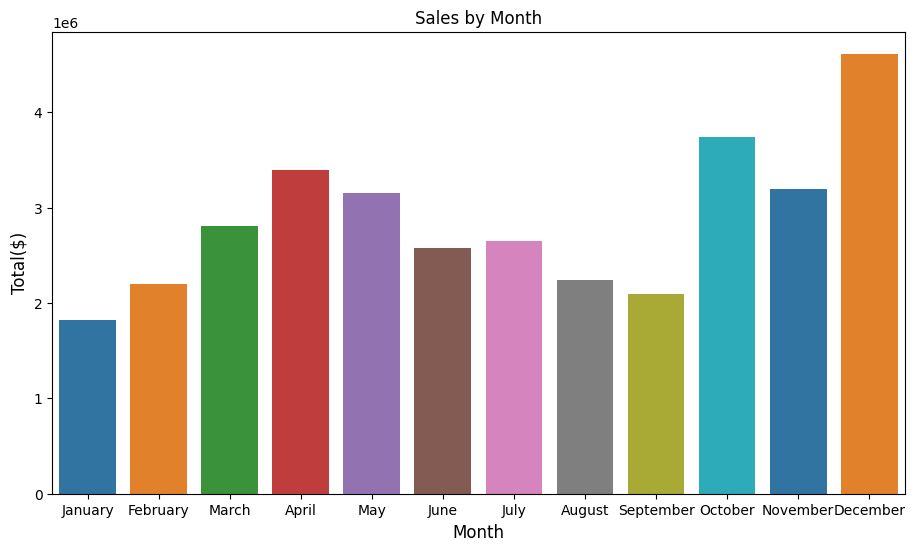

In [32]:
plt.figure(figsize=(11,6))
ax=sns.barplot(x="month_name",y="total",data=month_sales,hue="month_name",palette="tab10")
plt.title("Sales by Month")
plt.xlabel("Month",fontsize=12)
plt.ylabel("Total($)",fontsize=12)
plt.show()

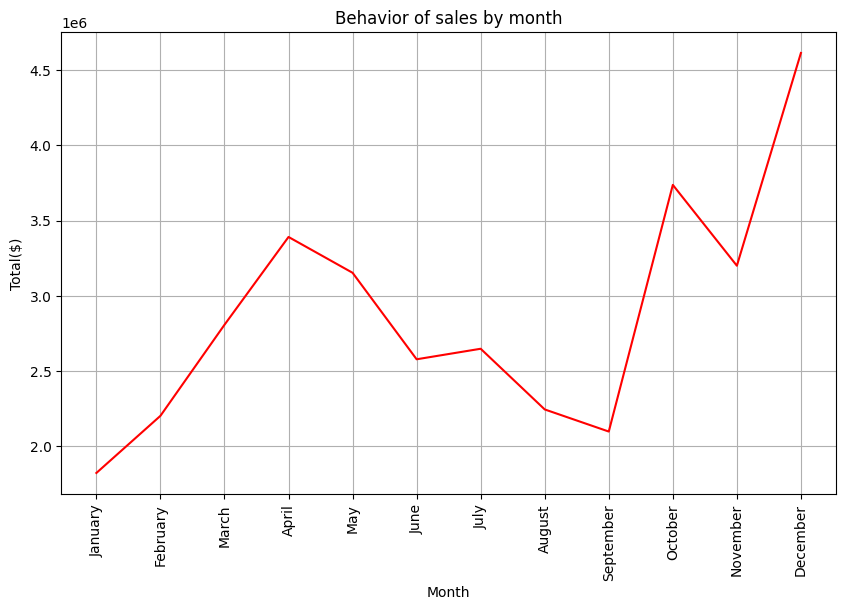

In [33]:
plt.figure(figsize=(10,6))
sns.lineplot(x="month_name",y="total",data=month_sales,color="red")
plt.xlabel("Month")
plt.ylabel("Total($)")
plt.title("Behavior of sales by month")
plt.xticks(rotation=90)
plt.grid()
plt.show()

#### 2. What city had the highest number of sales?

In [34]:
sales.head(5)

,order_id,product,quantity_ordered,price_each,total,order_date,month,month_name,city,purchase_address,source_file
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,04,April,Dallas (TX),"917 1st St, Dallas, TX 75001",Sales_April_2019.csv
1,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,04,April,Boston (MA),"682 Chestnut St, Boston, MA 02215",Sales_April_2019.csv
2,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,04,April,Los Angeles (CA),"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv
3,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,04,April,Los Angeles (CA),"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv
4,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,04,April,Los Angeles (CA),"333 8th St, Los Angeles, CA 90001",Sales_April_2019.csv


In [44]:
city_sales=sales.groupby(["city"],as_index=False).total.sum().sort_values("total",ascending=True)
city_sales

,city,total
6,Portland (ME),449758.27
1,Austin (TX),1819581.75
7,Portland (OR),1870732.34
9,Seattle (WA),2747755.48
3,Dallas (TX),2767975.40
0,Atlanta (GA),2795498.58
2,Boston (MA),3661642.01
5,New York City (NY),4664317.43
4,Los Angeles (CA),5452570.80
8,San Francisco (CA),8262203.91


In [36]:
print(f"The best city of sales is San Francisco with: $ {city_sales.total.max()}")

The best city of sales is San Francisco with: $ 8262203.91


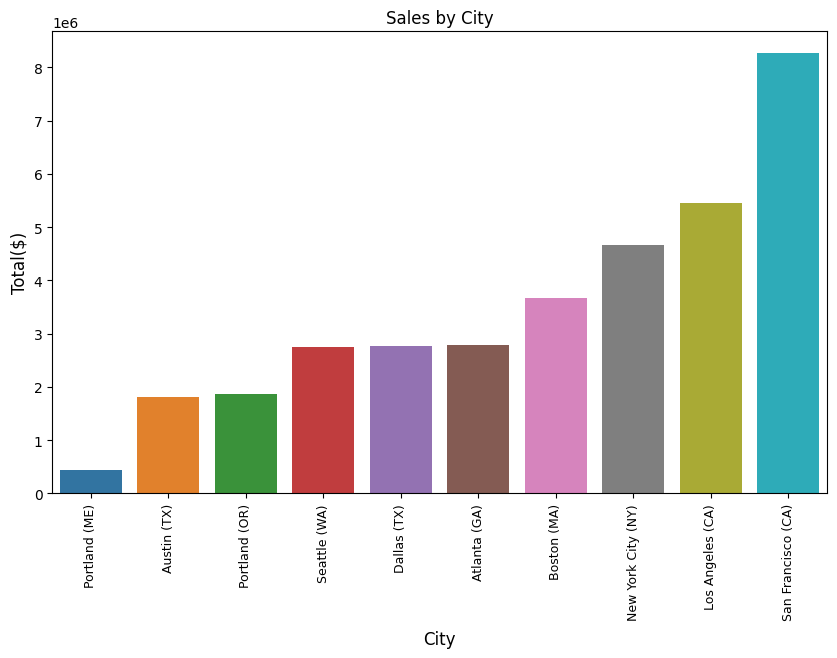

In [48]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x="city",y="total",data=city_sales,hue="city",legend=False,palette="tab10")
plt.title("Sales by City")
plt.xlabel("City",fontsize=12)
plt.ylabel("Total($)",fontsize=12)
plt.xticks(rotation=90,size=9)
plt.show()

#### 3. What time should we display advertisements to maximize likelihood of customer's buying products?

In [50]:
sales.sample()

,order_id,product,quantity_ordered,price_each,total,order_date,month,month_name,city,purchase_address,source_file
101801,219896,Lightning Charging Cable,1,14.95,14.95,06/18/19 13:26,06,June,Austin (TX),"636 13th St, Austin, TX 73301",Sales_June_2019.csv


In [51]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186304
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          185950 non-null  object 
 1   product           185950 non-null  object 
 2   quantity_ordered  185950 non-null  int32  
 3   price_each        185950 non-null  float64
 4   total             185950 non-null  float64
 5   order_date        185950 non-null  object 
 6   month             185950 non-null  object 
 7   month_name        185950 non-null  object 
 8   city              185950 non-null  object 
 9   purchase_address  185950 non-null  object 
 10  source_file       185950 non-null  object 
dtypes: float64(2), int32(1), object(8)
memory usage: 15.6+ MB


In [52]:
sales.insert(6,"hour","")

In [55]:
sales["hour"]=pd.to_datetime(sales["order_date"]).dt.hour
sales

C:\Users\diazc\AppData\Local\Temp\ipykernel_19172\2243497951.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales["hour"]=pd.to_datetime(sales["order_date"]).dt.hour


,order_id,product,quantity_ordered,price_each,total,order_date,hour,month,month_name,city,purchase_address,source_file
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,8,04,April,Dallas (TX),"917 1st St, Dallas, TX 75001",Sales_April_2019.csv
1,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,22,04,April,Boston (MA),"682 Chestnut St, Boston, MA 02215",Sales_April_2019.csv
2,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,14,04,April,Los Angeles (CA),"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv
3,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,14,04,April,Los Angeles (CA),"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv
4,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,9,04,April,Los Angeles (CA),"333 8th St, Los Angeles, CA 90001",Sales_April_2019.csv
...,...,...,...,...,...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,8.97,09/17/19 20:56,20,09,September,Los Angeles (CA),"840 Highland St, Los Angeles, CA 90001",Sales_September_2019.csv
186301,259354,iPhone,1,700.00,700.00,09/01/19 16:00,16,09,September,San Francisco (CA),"216 Dogwood St, San Francisco, CA 94016",Sales_September_2019.csv
186302,259355,iPhone,1,700.00,700.00,09/23/19 07:39,7,09,September,San Francisco (CA),"220 12th St, San Francisco, CA 94016",Sales_September_2019.csv
186303,259356,34in Ultrawide Monitor,1,379.99,379.99,09/19/19 17:30,17,09,September,San Francisco (CA),"511 Forest St, San Francisco, CA 94016",Sales_September_2019.csv


In [74]:
hour_sales=sales.groupby(["hour"],as_index=False).total.sum().sort_values("hour",ascending=True)
hour_sales

,hour,total
0,0,713721.27
1,1,460866.88
2,2,234851.44
3,3,145757.89
4,4,162661.01
5,5,230679.82
6,6,448113.00
7,7,744854.12
8,8,1192348.97
9,9,1639030.58


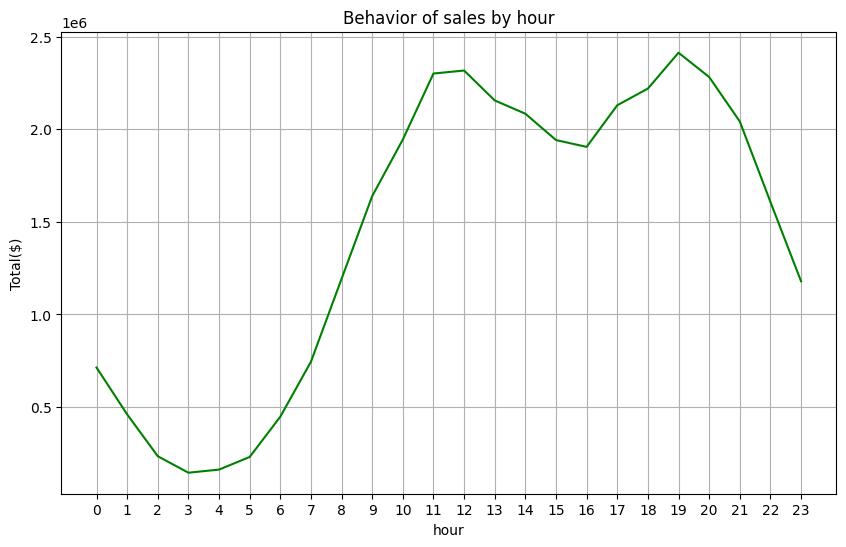

In [82]:
hours=[hour for hour,hour_sales in sales.groupby("hour")]
plt.figure(figsize=(10,6))
sns.lineplot(x="hour",y="total",data=hour_sales,color="green")
plt.xlabel("hour")
plt.ylabel("Total($)")
plt.title("Behavior of sales by hour")
plt.xticks(hours)
plt.grid()
plt.show()

#### We have peaks of sales at 12:00 and 19:00

#### 4. What products sold the most?

In [90]:
sales.head(5)

,order_id,product,quantity_ordered,price_each,total,order_date,hour,month,month_name,city,purchase_address,source_file
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,8,04,April,Dallas (TX),"917 1st St, Dallas, TX 75001",Sales_April_2019.csv
1,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,22,04,April,Boston (MA),"682 Chestnut St, Boston, MA 02215",Sales_April_2019.csv
2,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,14,04,April,Los Angeles (CA),"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv
3,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,14,04,April,Los Angeles (CA),"669 Spruce St, Los Angeles, CA 90001",Sales_April_2019.csv
4,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,9,04,April,Los Angeles (CA),"333 8th St, Los Angeles, CA 90001",Sales_April_2019.csv


In [119]:
product_sales=sales.groupby(["product"],as_index=False).quantity_ordered.sum().sort_values("quantity_ordered",ascending=False)
product_sales


,product,quantity_ordered
5,AAA Batteries (4-pack),31017
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23975
12,Lightning Charging Cable,23217
17,Wired Headphones,20557
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
2,27in FHD Monitor,7550
18,iPhone,6849
1,27in 4K Gaming Monitor,6244


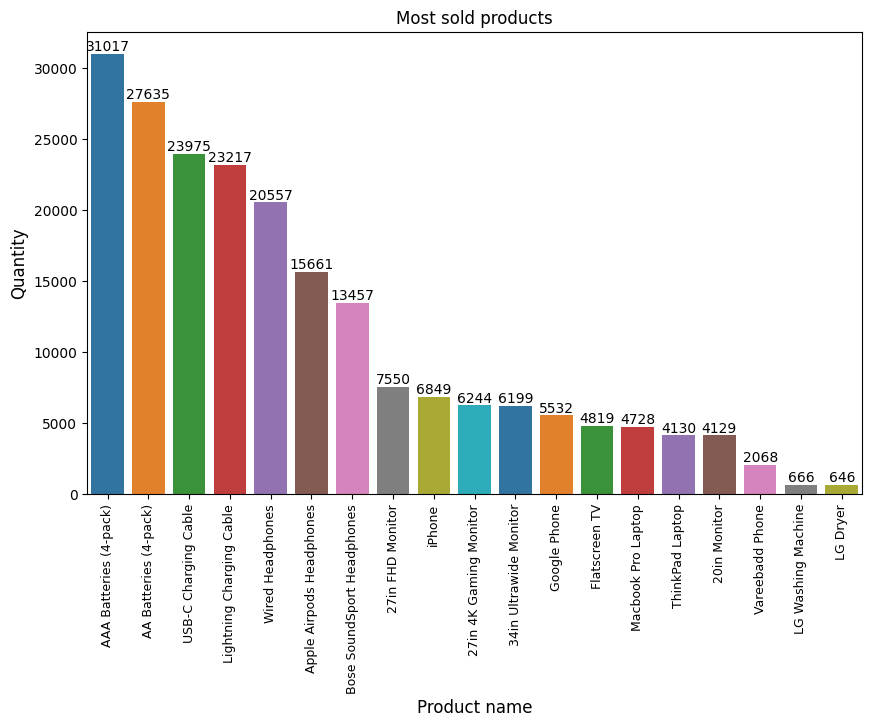

In [120]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x="product",y="quantity_ordered",data=product_sales,hue="product",palette="tab10")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Most sold products")
plt.xlabel("Product name",fontsize=12)
plt.ylabel("Quantity",fontsize=12)
plt.xticks(rotation=90,size=9)
plt.show()

In [113]:
# price list(Average price)

price_list=sales.groupby(["product"],as_index=False).price_each.mean()
price_list

,product,price_each
0,20in Monitor,109.99
1,27in 4K Gaming Monitor,389.99
2,27in FHD Monitor,149.99
3,34in Ultrawide Monitor,379.99
4,AA Batteries (4-pack),3.84
5,AAA Batteries (4-pack),2.99
6,Apple Airpods Headphones,150.00
7,Bose SoundSport Headphones,99.99
8,Flatscreen TV,300.00
9,Google Phone,600.00


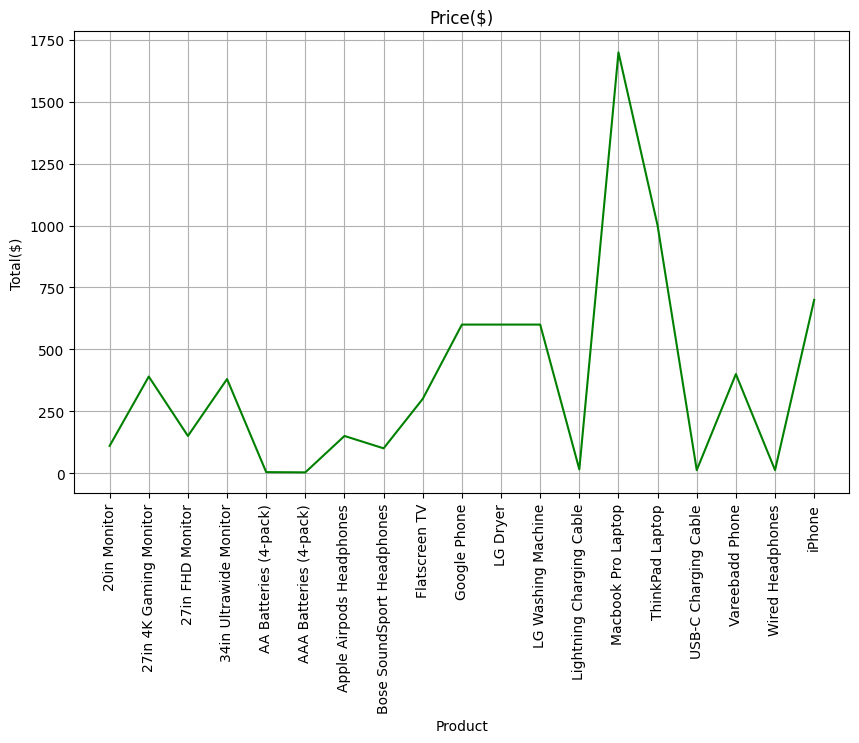

In [121]:
plt.figure(figsize=(10,6))
sns.lineplot(x="product",y="price_each",data=price_list,color="green")
plt.xlabel("Product")
plt.ylabel("Total($)")
plt.title("Price($)")
plt.xticks(rotation=90,size=10)
plt.grid()
plt.show()

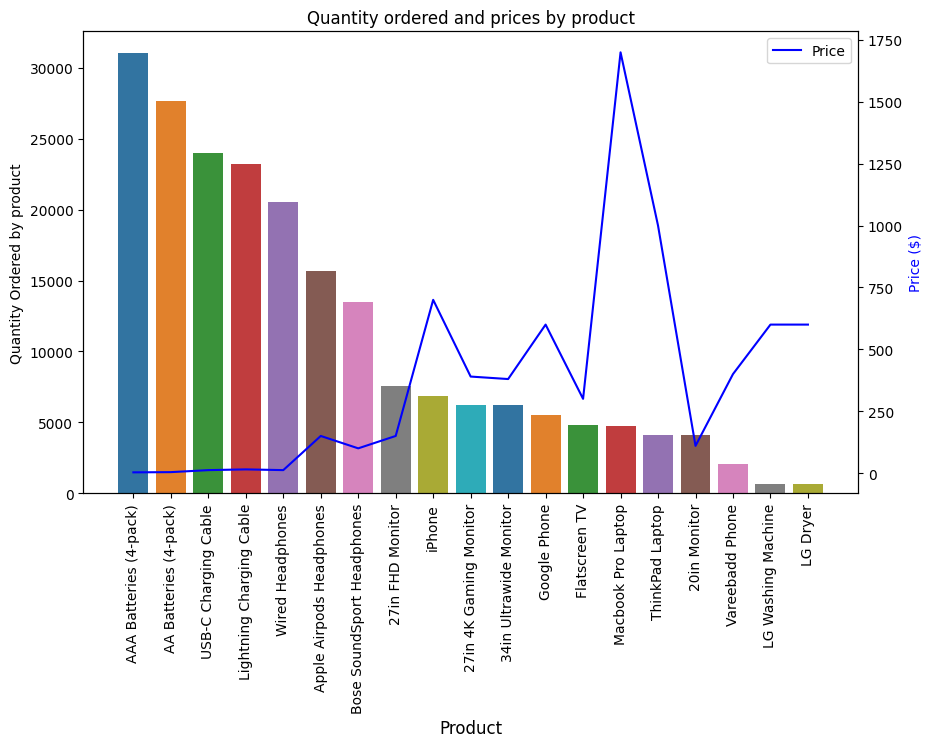

In [125]:
# Interlaying both plots for better understanding

fig=plt.figure(figsize=(10,6))
ax1=sns.barplot(x="product",y="quantity_ordered",hue="product",palette="tab10",data=product_sales)
plt.xticks(rotation=90,size=10)
plt.xlabel("Product",fontsize=12)
plt.ylabel("Quantity Ordered by product")
ax2=ax1.twinx()
ax2=sns.lineplot(x="product",y="price_each",data=price_list,label="Price",color="b")
plt.ylabel("Price ($)",color="b")
plt.title("Quantity ordered and prices by product")
plt.show()

##### The most sold products in 2019 are those who are basic for electronics, the price is consistent with the price. The lower the price, the more likely it is to increase the number of sales.

### 5. Sales Report

#### Sales Report [link](https://lookerstudio.google.com/reporting/110debc5-8b7a-4f4c-a26b-fce137cfbb6d)